# **PakEstimate 🏠**

## _**Name: Ahmad Talha Ansari**_
## _**Email: ahmadtalha963@gmail.com**_


# **Model Training**

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [2]:
df_clean = pd.read_csv("House_Buy_cleaned.csv")

In [8]:
X = df_clean.drop(['price'], axis=1).values
y = df_clean[['price']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [10]:
def print_metrics(X_test, y_test, model):
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Calculate adjusted R-squared
    n = X_test.shape[0]  # number of samples in the test set
    p = X_test.shape[1]  # number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Print the results
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("Adjusted R-squared:", adj_r2)
    print("Explained Variance Score:", explained_var)

## **Linear Regression**

In [11]:
lr = LinearRegression().fit(X_train, y_train)
print_metrics(X_test, y_test, lr)

Mean Squared Error: 0.09495250428177507
Root Mean Squared Error: 0.3081436422867995
Mean Absolute Error: 0.18183470783288852
R-squared: 0.8747567366411374
Adjusted R-squared: 0.8573265347239863
Explained Variance Score: 0.8747967236088772


## **Decision Tree Regressor**

In [12]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print_metrics(X_test, y_test, dt)

Mean Squared Error: 0.08403761473505737
Root Mean Squared Error: 0.2898924192438591
Mean Absolute Error: 0.15556546239603405
R-squared: 0.8891535805829864
Adjusted R-squared: 0.8737269985823582
Explained Variance Score: 0.889336647775812


## **Random Forest Regressor**

In [13]:
rf = RandomForestRegressor().fit(X_train, y_train)
print_metrics(X_test, y_test, rf)

c:\Users\ahmad\anaconda3\envs\pak-estimate\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.07713240006907292
Root Mean Squared Error: 0.27772720440942206
Mean Absolute Error: 0.1533989676964301
R-squared: 0.8982616249205528
Adjusted R-squared: 0.8841026165012619
Explained Variance Score: 0.898444888442249


## **Explainable AI**

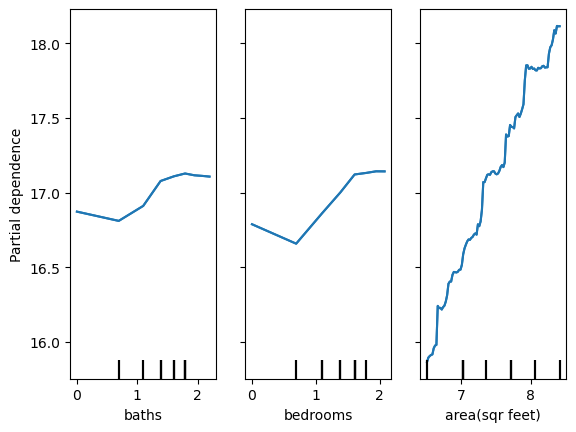

In [16]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(rf, df_clean[['baths', 'bedrooms', 'area(sqr feet)', 'city_ islamabad']],
                                                [0, 1, 2])
disp2 = PartialDependenceDisplay.from_estimator(rf, df_clean[['baths', 'bedrooms', 'area(sqr feet)', 'city_ islamabad']], 
                                                [0, 1, 2], ax=disp1.axes_)

plt.show()

## Saving Models

In [17]:
import pickle
with open("decision_tree.pkl", "wb") as file:
    pickle.dump(dt, file)

In [18]:
with open("random_forest.pkl", "wb") as file:
    pickle.dump(rf, file)

In [19]:
with open("linear_regressor.pkl", "wb") as file:
    pickle.dump(lr, file)